<a href="https://colab.research.google.com/github/nistrate/Statistics/blob/main/MATH345_LAB_W9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this lab we will dive a bit into the world of Machine Learning. The knowledge of Statistics is crucial in the field of ML. However as important as knowing all the types of tests is, it is more important to realize that while these tests give us important insights, they also can easily provide us with erroneous conclusions about the data. 

Today, we will consider the case when an $R^2$ test can provide erroneous conclusion about our data. For this, you will work with a fictive dataset. The provided dataset describes a function $f(x)$ and your goal is to determine it.
 

1.   Import the dataset using the `pickle` library.
2.   Plot the dataset on an $XY$ plot, where the first dimension of the imported dataset represents the $x$ values, while the second represents the corresponding $f(x)$ values.
3.    Fit the data using polynomials of the following degrees $d = 1, 3, 5, 10, 25$. The function `np.polyfit()` might be useful.
4.    Plot the predicted fit functions $\hat{f_{d}}(x)$ against your data.
5.    Compute the $R^2$ value between the raw data and your fit data.
6.    Based on the $R^2$ value present the function describes your data the best.

**When plotting, don't forget to label your axis, title your plot, and show a legend!**

In [254]:
import numpy as np
from scipy.stats import linregress

import matplotlib.pyplot as plt

from google.colab import files 

uploaded = files.upload()
filename = "MATH_345_linear regression_raw_data"
infile = open(filename,'rb')
data_import = pickle.load(infile)
infile.close()

Saving MATH_345_linear regression_raw_data to MATH_345_linear regression_raw_data (2)


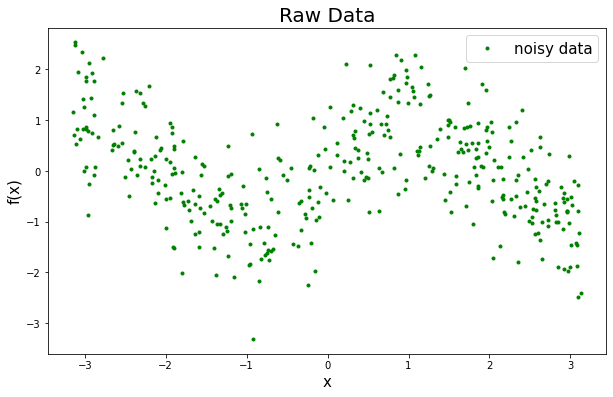

In [255]:
x = data_import[0]
my_signal = data_import[1]

plt.figure(figsize = (10,6))

plt.plot(x, my_signal, ".", color  = 'green', label = 'noisy data')
plt.legend(fontsize = 15)

plt.xlabel('x', fontsize = 15)
plt.ylabel('f(x)', fontsize = 15)

plt.title('Raw Data', fontsize = 20)

plt.show()

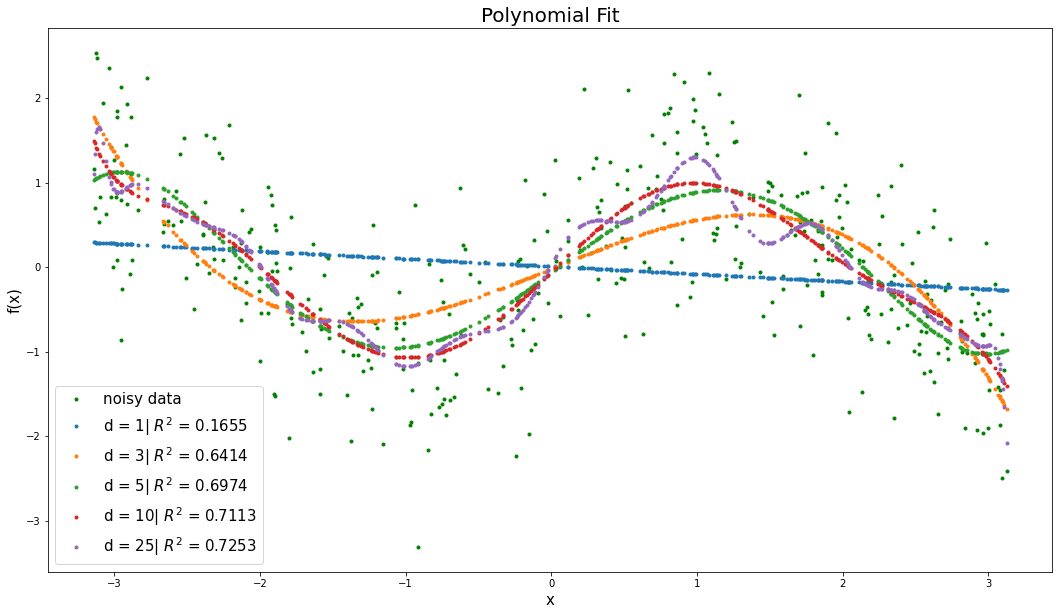

In [256]:
# This is a function that uses the fit coefficients w to create a polynomial of degree d
 
def f_hat(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)




#fitting the functions

poly_order = [1, 3, 5, 10, 25]
w = []
y_hat = []
r = []
for dim in poly_order:
  w_temp = np.polyfit(x, my_signal, dim)
  w.append(w_temp)

  y_hat.append(f_hat(x, w_temp))
  slope, intercept, r_value, p_value, std_err = linregress(my_signal, f_hat(x, w_temp))
  r.append(r_value)


plt.figure(figsize = (18,10))

plt.plot(x, my_signal, ".", color  = 'green', label = 'noisy data')
for d_idx in range (len(poly_order)):
    plt.plot(x, y_hat[d_idx], ".", label = 'd = '+str(poly_order[d_idx])+"| $R^2$ = "+str(np.round(r[d_idx],4)) )

plt.legend(fontsize = 15)

#    plt.plot(x, funct(x), ".", color  = 'blue', label = 'f(x)')
    
plt.xlabel('x', fontsize = 15)
plt.ylabel('f(x)', fontsize = 15)

plt.title('Polynomial Fit', fontsize = 20)


plt.show()

Now that you have determined the best function that fits the data, let us consider the reality hidden under the veil of perception. The data you were given was generated by adding a Gaussian noise $\mathcal{N}(0,0.75)$ to a sinusoidal $f(x) = \sin [1.5x]$. The majority of processes in nature are noisy. Your goal now is to:

1.  Plot $f(x)$ and all $\hat{f_d}(x)$.
2.  Compute the $R^2$ value between the previously generated $\hat{f_d}(x)$ and the actual model $f(x)$, for all $d$.
3.  Based on the $R^2$ values, which the function $\hat{f_d}(x)$ describes your data the best? 
3.  Draw your conclusions. A $5-10$ sentence paragraph will suffice.

**When plotting, don't forget to label your axis, title your plot, and show a legend!**

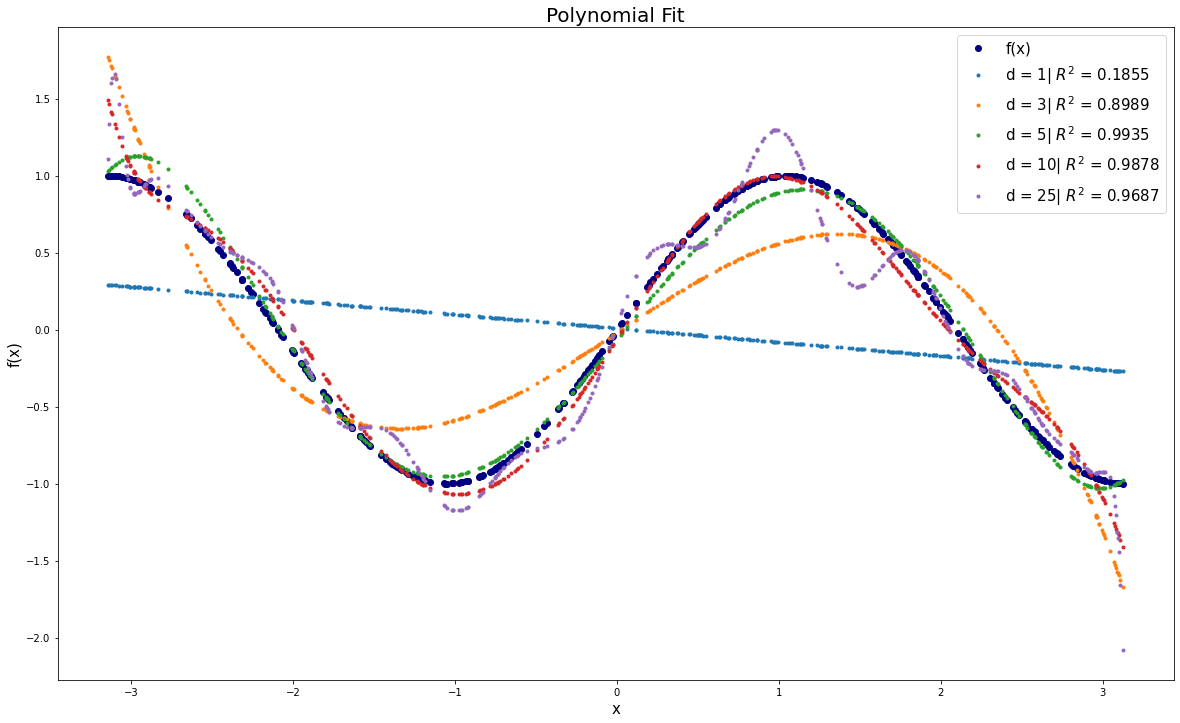

In [257]:
# defining f(x) - actual model
def funct(x):
    signal =  np.sin(1.5*x)#+np.sin(20*x)+0.5*np.sin(40*x)
    return signal 

# R-square value between the generated model and the true model

r_true = []

for d_idx in range(len(poly_order)):
  slope, intercept, r_value, p_value, std_err = linregress(funct(x), y_hat[d_idx])
  r_true.append(r_value)


plt.figure(figsize = (20,12))

#plt.plot(x, my_signal, ".", color  = 'green', label = 'noisy data')
plt.plot(x, funct(x), "o", color  = 'navy', label = 'f(x)')
for d_idx in range (len(poly_order)):
    plt.plot(x, y_hat[d_idx], ".", label = 'd = '+str(poly_order[d_idx])+"| $R^2$ = "+str(np.round(r_true[d_idx],4)) )

plt.legend(fontsize = 15)

#    plt.plot(x, funct(x), ".", color  = 'blue', label = 'f(x)')
    
plt.xlabel('x', fontsize = 15)
plt.ylabel('f(x)', fontsize = 15)

plt.title('Polynomial Fit', fontsize = 20)


plt.show()